# Exploratory Data Analisys

## Load bioactivity data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/estrogen_receptor_alpha_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL431611,Oc1ccc2c(c1)S[C@H](C1CCCC1)[C@H](c1ccc(OCCN3CC...,2.5,active
1,CHEMBL316132,Oc1ccc2c(c1)S[C@H](C1CCCCCC1)[C@H](c1ccc(OCCN3...,7.5,active
2,CHEMBL304552,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3CCC...,3.1,active
3,CHEMBL85881,Oc1ccc2c(c1)S[C@H](CC1CCCCC1)[C@H](c1ccc(OCCN3...,3.9,active
4,CHEMBL85536,Oc1ccc2c(c1)S[C@H](Cc1ccccc1)[C@H](c1ccc(OCCN3...,7.4,active
...,...,...,...,...
3073,CHEMBL4475463,O=C(O)c1ccc2c(c1)CCCC(c1ccc(Cl)cc1Cl)=C2c1ccc(...,57.7,active
3074,CHEMBL5185539,CC(F)(F)c1cc(Cl)ccc1-c1sc2c(ccc3[nH]ncc32)c1Oc...,10.3,active
3075,CHEMBL5197035,CC(F)(F)c1cc(Cl)ccc1-c1sc2c(ccc3[nH]ncc32)c1Oc...,13.1,active
3076,CHEMBL5196589,O=S(=O)(Oc1cccc2ccccc12)C1CC2OC1C(c1ccc([Se]c3...,310.0,active


In [3]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL431611,2.5,active,Oc1ccc2c(c1)S[C@H](C1CCCC1)[C@H](c1ccc(OCCN3CC...
1,CHEMBL316132,7.5,active,Oc1ccc2c(c1)S[C@H](C1CCCCCC1)[C@H](c1ccc(OCCN3...
2,CHEMBL304552,3.1,active,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3CCC...
3,CHEMBL85881,3.9,active,Oc1ccc2c(c1)S[C@H](CC1CCCCC1)[C@H](c1ccc(OCCN3...
4,CHEMBL85536,7.4,active,Oc1ccc2c(c1)S[C@H](Cc1ccccc1)[C@H](c1ccc(OCCN3...
...,...,...,...,...
3073,CHEMBL4475463,57.7,active,O=C(O)c1ccc2c(c1)CCCC(c1ccc(Cl)cc1Cl)=C2c1ccc(...
3074,CHEMBL5185539,10.3,active,CC(F)(F)c1cc(Cl)ccc1-c1sc2c(ccc3[nH]ncc32)c1Oc...
3075,CHEMBL5197035,13.1,active,CC(F)(F)c1cc(Cl)ccc1-c1sc2c(ccc3[nH]ncc32)c1Oc...
3076,CHEMBL5196589,310.0,active,O=S(=O)(Oc1cccc2ccccc12)C1CC2OC1C(c1ccc([Se]c3...


## Lipinski's rule
The Lipinski descriptors are used to evaluate the drug-likeness property of compounds. The 4 descriptors provides a rough idea as to whether compounds are "drug-like" or not. Lipinski's rule states that, in general, an orally active drug has no more than one violation of the following criteria:
1) *No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)*
2) *No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)*
3) *A molecular mass less than 500 daltons*
4) *A calculated octanol-water partition coefficient (Clog P) that does not exceed 5*

*Note that all numbers are multiples of five, which is the origin of the rule's name.

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculate descriptors using *canonical_smiles*

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df_clean_smiles['canonical_smiles'])
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,439.621,6.0415,1.0,5.0
1,467.675,6.8217,1.0,5.0
2,463.599,5.9296,2.0,6.0
3,467.675,6.8217,1.0,5.0
4,461.627,6.0940,1.0,5.0
...,...,...,...,...
3073,554.489,7.7997,1.0,3.0
3074,572.052,8.4246,1.0,5.0
3075,571.068,8.4577,2.0,5.0
3076,625.604,5.0597,1.0,5.0


In [9]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL431611,Oc1ccc2c(c1)S[C@H](C1CCCC1)[C@H](c1ccc(OCCN3CC...,2.5,active,439.621,6.0415,1.0,5.0
1,CHEMBL316132,Oc1ccc2c(c1)S[C@H](C1CCCCCC1)[C@H](c1ccc(OCCN3...,7.5,active,467.675,6.8217,1.0,5.0
2,CHEMBL304552,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3CCC...,3.1,active,463.599,5.9296,2.0,6.0
3,CHEMBL85881,Oc1ccc2c(c1)S[C@H](CC1CCCCC1)[C@H](c1ccc(OCCN3...,3.9,active,467.675,6.8217,1.0,5.0
4,CHEMBL85536,Oc1ccc2c(c1)S[C@H](Cc1ccccc1)[C@H](c1ccc(OCCN3...,7.4,active,461.627,6.0940,1.0,5.0
...,...,...,...,...,...,...,...,...
3073,CHEMBL4475463,O=C(O)c1ccc2c(c1)CCCC(c1ccc(Cl)cc1Cl)=C2c1ccc(...,57.7,active,554.489,7.7997,1.0,3.0
3074,CHEMBL5185539,CC(F)(F)c1cc(Cl)ccc1-c1sc2c(ccc3[nH]ncc32)c1Oc...,10.3,active,572.052,8.4246,1.0,5.0
3075,CHEMBL5197035,CC(F)(F)c1cc(Cl)ccc1-c1sc2c(ccc3[nH]ncc32)c1Oc...,13.1,active,571.068,8.4577,2.0,5.0
3076,CHEMBL5196589,O=S(=O)(Oc1cccc2ccccc12)C1CC2OC1C(c1ccc([Se]c3...,310.0,active,625.604,5.0597,1.0,5.0


## Checking the distribution of 'IC50' values:

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

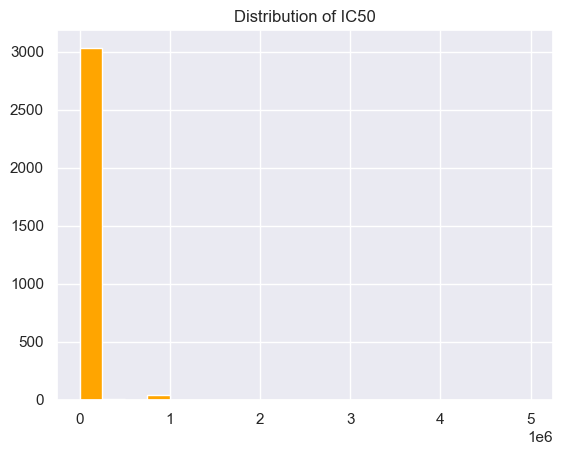

In [11]:
ic_50 = df['standard_value']

plt.hist(ic_50, color = 'orange', bins = 20)
plt.title('Distribution of IC50')
plt.show()

### Convert IC50 to pIC50
To allow '*IC50*' data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

Custom function pIC50() will accept a DataFrame as input and will:

1) Take the IC50 values from the '*standard_value*' column and converts it from nM to M by multiplying the value by 10
2) Take the molar value and apply -log10
3) Delete the '*standard_value column*' and create a new pIC50 column

In [12]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns='standard_value')
        
    return x

In [13]:
df_combined['standard_value'].describe()

count    3.078000e+03
mean     2.458034e+04
std      1.644088e+05
min      2.000000e-03
25%      1.702500e+01
50%      3.600000e+02
75%      8.306323e+03
max      5.000000e+06
Name: standard_value, dtype: float64

In [14]:
df_log = pIC50(df_combined)

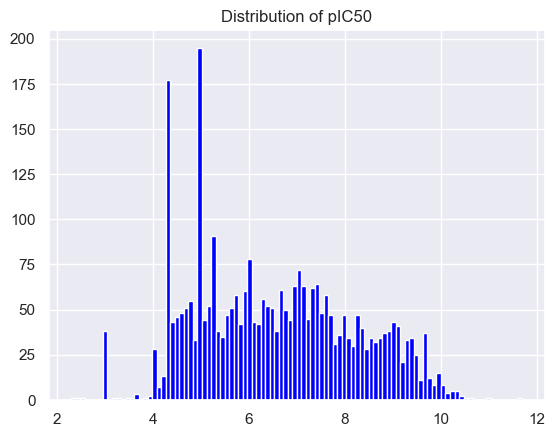

In [15]:
pic_50 = df_log['pIC50']

plt.hist(pic_50, color = 'blue', bins = 100)
plt.title('Distribution of pIC50')
plt.show()

In [16]:
df_log['pIC50'].describe()

count    3078.000000
mean        6.551411
std         1.664851
min         2.301030
25%         5.080591
50%         6.443697
75%         7.768914
max        11.698970
Name: pIC50, dtype: float64

In [17]:
df_log

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL431611,Oc1ccc2c(c1)S[C@H](C1CCCC1)[C@H](c1ccc(OCCN3CC...,active,439.621,6.0415,1.0,5.0,8.602060
1,CHEMBL316132,Oc1ccc2c(c1)S[C@H](C1CCCCCC1)[C@H](c1ccc(OCCN3...,active,467.675,6.8217,1.0,5.0,8.124939
2,CHEMBL304552,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3CCC...,active,463.599,5.9296,2.0,6.0,8.508638
3,CHEMBL85881,Oc1ccc2c(c1)S[C@H](CC1CCCCC1)[C@H](c1ccc(OCCN3...,active,467.675,6.8217,1.0,5.0,8.408935
4,CHEMBL85536,Oc1ccc2c(c1)S[C@H](Cc1ccccc1)[C@H](c1ccc(OCCN3...,active,461.627,6.0940,1.0,5.0,8.130768
...,...,...,...,...,...,...,...,...
3073,CHEMBL4475463,O=C(O)c1ccc2c(c1)CCCC(c1ccc(Cl)cc1Cl)=C2c1ccc(...,active,554.489,7.7997,1.0,3.0,7.238824
3074,CHEMBL5185539,CC(F)(F)c1cc(Cl)ccc1-c1sc2c(ccc3[nH]ncc32)c1Oc...,active,572.052,8.4246,1.0,5.0,7.987163
3075,CHEMBL5197035,CC(F)(F)c1cc(Cl)ccc1-c1sc2c(ccc3[nH]ncc32)c1Oc...,active,571.068,8.4577,2.0,5.0,7.882729
3076,CHEMBL5196589,O=S(=O)(Oc1cccc2ccccc12)C1CC2OC1C(c1ccc([Se]c3...,active,625.604,5.0597,1.0,5.0,6.508638


## Frequency plot of 3 bioactivity classes

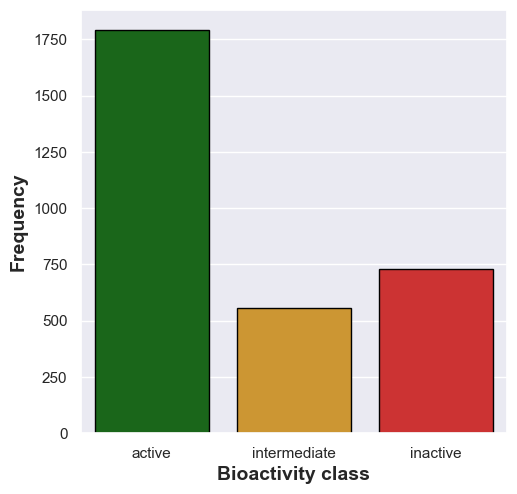

In [18]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_log, edgecolor='black', hue='class', palette=['green', 'orange', 'red'], saturation=0.6)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_bioactivity_class.pdf')

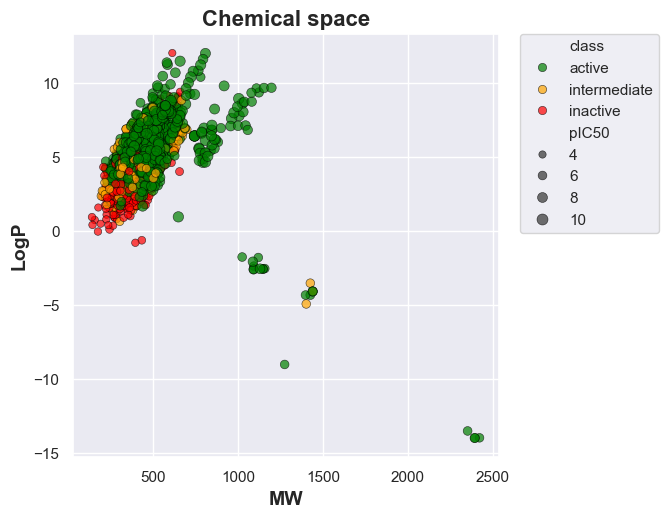

In [19]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_log, hue='class', size='pIC50', edgecolor='black', alpha=0.7, palette=['green', 'orange', 'red'])

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.title('Chemical space', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Visible outliers should be excluded for LogP values below 0.

In [20]:
df_final = df_log.drop(df_log[df_log['LogP'] < 0].index)

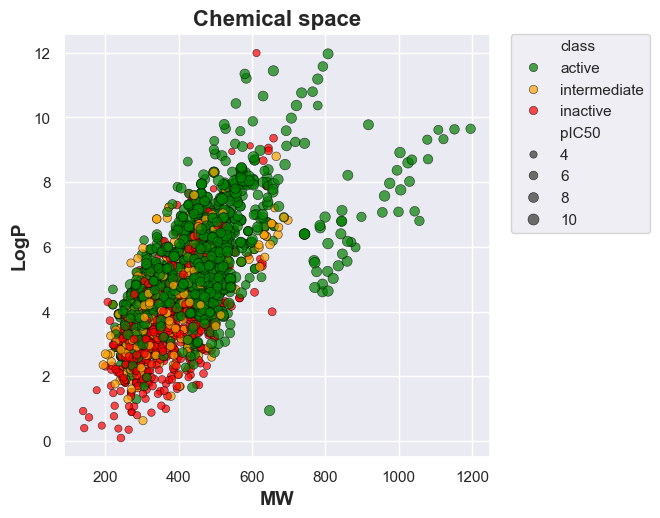

In [21]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7, palette=['green', 'orange', 'red'])

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.title('Chemical space', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('Plots/chemical_space.pdf')

We can see that our inhibitors occupy similar chemical space, where *actives* are shiffted to higher values of MW and LogP

## Kruskal-Wallis test:
is a non-parametric method for testing whether samples originate from the same distribution. It is used for comparing two or more independent samples of equal or different sample sizes. It extends the *Mann–Whitney U test*, which is used for comparing only two groups. 
A significant Kruskal–Wallis test indicates that at least one sample stochastically dominates one other sample. The test does not identify where this stochastic dominance occurs or for how many pairs of groups stochastic dominance obtains.

## Dunn's test:
is a non-parametric pairwise multiple comparisons procedure based on rank sums, often used as a *post hoc* procedure following rejection of a Kruskal–Wallis test. 

## Our goal:
### With *Kruskal-Wallis test*:
-  We are testing whether there is statistically significant difference between the actives, intermediates and inactives for a descriptor of interest. If there is a difference then it means that this particular descriptor is crucial for a compound being active, intermediate or inactive. In a nutshell we are figuring out which descriptors are important for a compound potency.
- Null-hypothesis($H_{0}$): there is no statistical difference between these groups. Hence, if we reject $H_{0}$, then there is at least one group different from the rest.
### With *Dunn's test*:
- We are using pairwise comparisons for a descriptor of interest across three groups of inhibitors


In [22]:
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

In [23]:
def kruskal_dunn_test(descriptor):
    # actives, intermediate and inactives
    selection = [descriptor, 'class']
    df = df_final[selection]
    
    active = df[df['class'] == 'active']
    active = active[descriptor]

    intermediate = df[df['class'] == 'intermediate']
    intermediate = intermediate[descriptor]

    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]
    
    # compare samples
    statistic, p_value = kruskal(active, intermediate, inactive)
    
    # interpret
    alpha = 0.05
    if p_value > alpha:
        interpretation = 'There is no difference between groups (fail to reject H0)'
        
    else:
        interpretation = 'There is difference between groups (reject H0)'
        
        # dunn's test
        dunn_results = posthoc_dunn([active, intermediate, inactive], p_adjust='bonferroni')
        dunn_results.columns = ['active', 'intermediate', 'inactive']
        dunn_results.index = ['active', 'intermediate', 'inactive']
  
    results = pd.DataFrame({'Descriptor':descriptor,
                            'Statistics':statistic,
                            'alpha':alpha,
                            'p':p_value,
                            'Active and Intermediate': dunn_results.loc['intermediate']['active'],
                            'Active and Inactive': dunn_results.loc['inactive']['active'],
                            'Intermediate and Inactive': dunn_results.loc['inactive']['intermediate'],
                            'Interpretation':interpretation}, index=[0])
    filename = f'KWD_test/kruskal_wallis_{descriptor}.csv'
    results.to_csv(filename)

    return results

In [24]:
pd.options.display.float_format = '{:.3f}'.format

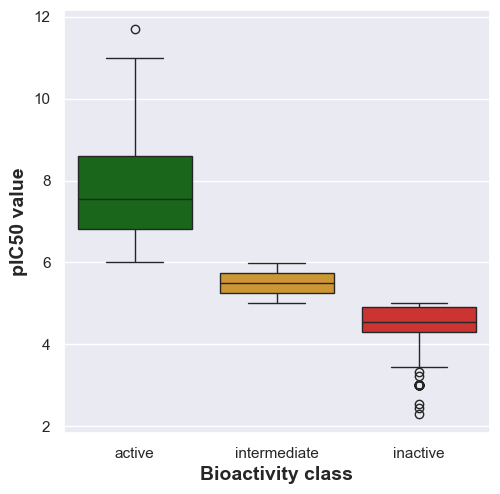

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='pIC50', data=df_final, hue='class', palette=['green', 'orange', 'red'], saturation=0.6)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_ic50.pdf')

In [26]:
kruskal_pic50 = kruskal_dunn_test('pIC50')
kruskal_pic50

,Descriptor,Statistics,alpha,p,Active and Intermediate,Active and Inactive,Intermediate and Inactive,Interpretation
0,pIC50,2395.679,0.050,0.000,0.000,0.000,0.000,There is difference between groups (reject H0)


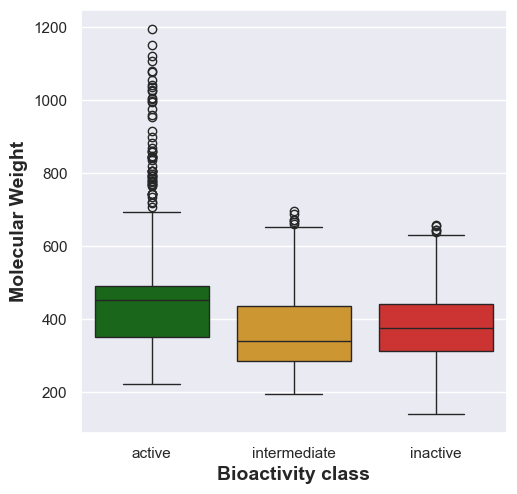

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='MW', data=df_final, hue='class', palette=['green', 'orange', 'red'], saturation=0.6)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Molecular Weight', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_mw.pdf')

In [28]:
kruskal_mw = kruskal_dunn_test('MW')
kruskal_mw

,Descriptor,Statistics,alpha,p,Active and Intermediate,Active and Inactive,Intermediate and Inactive,Interpretation
0,MW,292.353,0.050,0.000,0.000,0.000,0.025,There is difference between groups (reject H0)


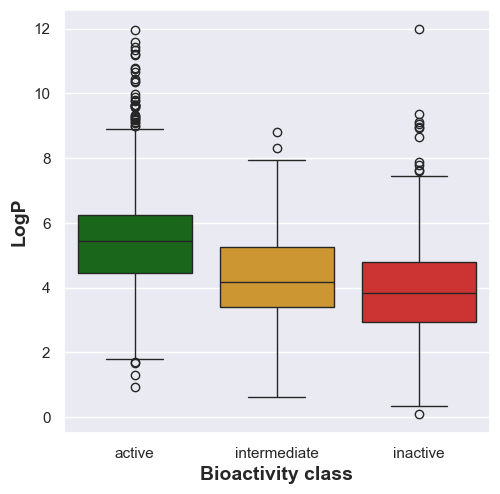

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='LogP', data=df_final, hue='class', palette=['green', 'orange', 'red'], saturation=0.6)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_logp.pdf')

In [30]:
kruskal_logp = kruskal_dunn_test('LogP')
kruskal_logp

,Descriptor,Statistics,alpha,p,Active and Intermediate,Active and Inactive,Intermediate and Inactive,Interpretation
0,LogP,587.865,0.050,0.000,0.000,0.000,0.000,There is difference between groups (reject H0)


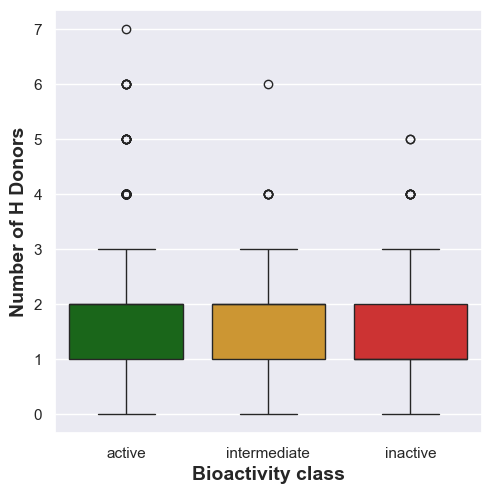

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='NumHDonors', data=df_final, hue='class', palette=['green', 'orange', 'red'], saturation=0.6)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Number of H Donors', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_hdonors.pdf')

In [32]:
kruskal_donors = kruskal_dunn_test('NumHDonors')
kruskal_donors

,Descriptor,Statistics,alpha,p,Active and Intermediate,Active and Inactive,Intermediate and Inactive,Interpretation
0,NumHDonors,262.562,0.050,0.000,0.000,0.000,0.000,There is difference between groups (reject H0)


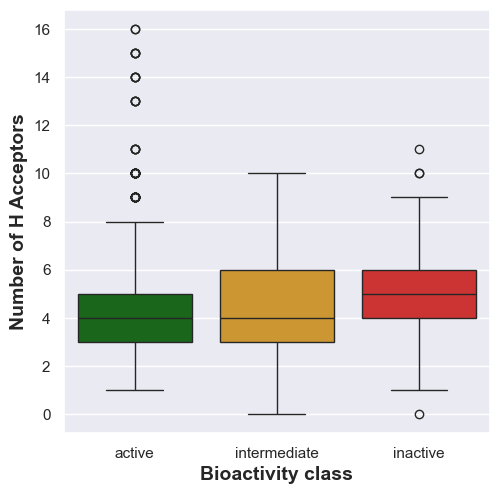

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='NumHAcceptors', data=df_final, hue='class', palette=['green', 'orange', 'red'], saturation=0.6)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Number of H Acceptors', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_hacceptors.pdf')

In [34]:
kruskal_acceptors = kruskal_dunn_test('NumHAcceptors')
kruskal_acceptors

,Descriptor,Statistics,alpha,p,Active and Intermediate,Active and Inactive,Intermediate and Inactive,Interpretation
0,NumHAcceptors,76.859,0.050,0.000,1.000,0.000,0.000,There is difference between groups (reject H0)


## *Kruskal-Wallis* and *Dunn's* test:

In [35]:
kruskal_combined = pd.concat([kruskal_pic50, kruskal_mw, kruskal_logp, kruskal_donors, kruskal_acceptors], axis=0)
kruskal_combined = kruskal_combined.reset_index().drop(['index'], axis=1)
kruskal_combined.to_csv('KWD_test/kruskal_dunns_combined.csv')
kruskal_combined

,Descriptor,Statistics,alpha,p,Active and Intermediate,Active and Inactive,Intermediate and Inactive,Interpretation
0,pIC50,2395.679,0.050,0.000,0.000,0.000,0.000,There is difference between groups (reject H0)
1,MW,292.353,0.050,0.000,0.000,0.000,0.025,There is difference between groups (reject H0)
2,LogP,587.865,0.050,0.000,0.000,0.000,0.000,There is difference between groups (reject H0)
3,NumHDonors,262.562,0.050,0.000,0.000,0.000,0.000,There is difference between groups (reject H0)
4,NumHAcceptors,76.859,0.050,0.000,1.000,0.000,0.000,There is difference between groups (reject H0)


## Interpretation of Statistical Results
### Box Plots
1) **pIC50 values**:

Taking a look at pIC50 values, the actives, intermediates and inactives displayed *statistically significant difference*, which is to be expected since threshold values: 
- Actives > 1,000 nM IC50
- 1,000 nM IC50 < Intermediates < 10,000 nM IC50
- 10,000 nM IC50 < Inactives
  
were used to define actives, intermediates and inactives.

2) **Lipinski's descriptors**:

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), all descriptors showed *statistically significant difference* between at least one group (actives, intermediates or inactives) from rest.
Using *Dunn's test* we were able to get insight into pairwise comparisons between them.
- MW, LogP and NumHDonors showed *statistically significant difference* between all of the groups.
- NumHAcceptors showed ***no** statistically significant difference* between Active and Intermediate.


In [36]:
df_final.to_csv('Data/estrogen_receptor_alpha_bioactivity_data_final.csv', index=False)